In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#1. Load and Visualise the Data

In [3]:
#-Download 
#-load 
#-Visualise
#-Normalize

In [4]:
X=pd.read_csv('Linear_X_Train.csv')

In [5]:
Y=pd.read_csv('Linear_Y_Train.csv')

In [6]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [7]:
Y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [8]:
#Converting X,Y into numpy arrays
#Actually X,Y are pandas dataframe

X=X.values
Y=Y.values


In [9]:
X.shape, Y.shape

((3750, 1), (3750, 1))

In [10]:
type(X)
#can covert it into numpy array

numpy.ndarray

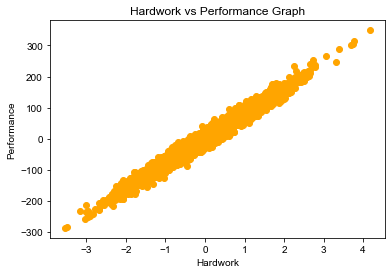

In [11]:

#Normalisation (only x values are normalised)
u=X.mean()
std=X.std()
X=(X-u)/std



#Visualise
plt.scatter(X,Y,color='orange')
plt.style.use('seaborn')
plt.title('Hardwork vs Performance Graph')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

Section 2.

# Linear Regresssion

In [12]:
def hypothesis(x,theta):
    y_=x*theta[1]+theta[0]
    return y_

In [13]:
  def gradient(X,Y,theta):
        m=X.shape[0]
        grad=np.zeros((2,))
        for i in range(m):
            x=X[i]
            y_=hypothesis(X[i],theta)
            y=Y[i]
            grad[0]+=(y_-y)
            grad[1]+=(y_-y)*x
        return grad/m

In [14]:
def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        total_error+=(y_-Y[i])**2
    return total_error/m
 
    

In [48]:
def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    
    for i in range(max_steps):
        
        #Compute grad
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        #Update theta
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
        
    return theta,error_list,theta_list

        
    

In [49]:
theta,error_list,theta_list=gradientDescent(X,Y)

In [55]:
#theta_list

In [54]:
#error_list

Text(0.5, 1.0, 'Reduction in error over time(epochs)')

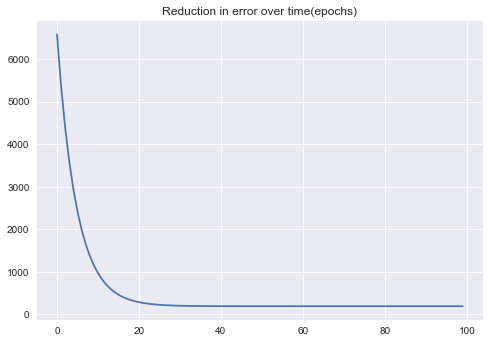

In [21]:
plt.plot(error_list)
plt.title('Reduction in error over time(epochs)')

# Section-3 Predictions and the Best Line

In [22]:
y_=hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


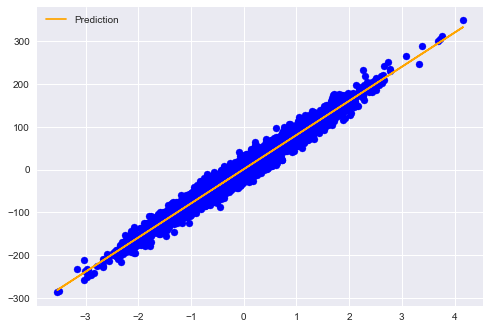

In [23]:
plt.scatter(X,Y,color='blue')
plt.plot(X,y_,color='orange',label='Prediction')
plt.legend()   #used to print the label
plt.show()


In [24]:
#Load the test data

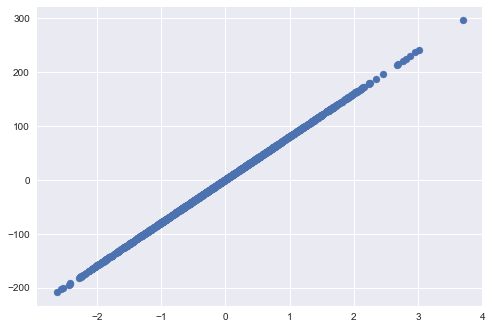

In [25]:
X_test=pd.read_csv('Linear_X_Test.csv')
y_test=hypothesis(X_test,theta)

#y_test.shape
y_test

plt.scatter(X_test,y_test)

In [26]:
#Submission(write into a csv file)
print(y_test)
import csv

               x
0    -149.370696
1     -68.754940
2    -201.486870
3     221.234243
4      47.906897
...          ...
1245  -12.744630
1246   75.171802
1247   10.912138
1248  -21.532358
1249  -53.684600

[1250 rows x 1 columns]


In [27]:
df=pd.DataFrame(y_test)


In [28]:
df.columns=['y']
df.to_csv('output.csv',index=False)

In [29]:
df

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


# Section 3. Calculation of Score

 Score is R2(R-Squared or Coefficient of determination)

In [30]:
def r2_score(Y,Y_):
    #Instead of a loop,use np.sum bcz it is faster
    num=np.sum((Y-Y_)**2)
    den=np.sum((Y-Y.mean())**2)
    score=1-(num/den)
    return score*100

In [32]:
r2_score(Y,y_)

97.09612226971643

## Section -5| Visualising Loss Function,Gradient Descent, Theta Updates

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [37]:
theta

array([ 0.6838508 , 79.90361453])

In [63]:
#Loss Actually
T0=np.arange(-40,40,1)
T1=np.arange(40,120,1)
#print (T0,T1)

T0,T1=np.meshgrid(T0,T1)
J=np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_=T1[i,j]*X+T0[i,j]
        J[i,j]=np.sum((Y-y_)**2)/Y.shape[0]
        # here m=y.shape[0]
        #dividing by the no. of examples
        
print (J.shape)




(80, 80)


In [45]:
#Visualise the Loss(J)

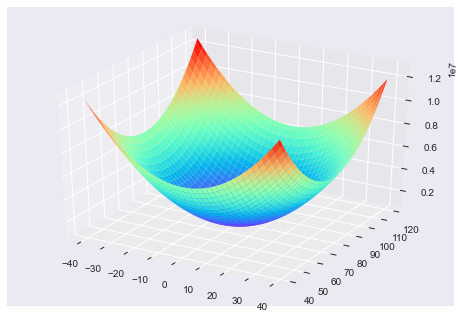

In [46]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')

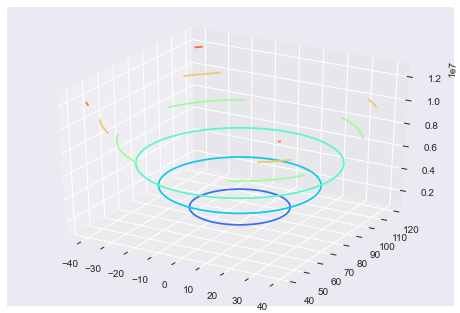

In [47]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')

# Plot changes in the values of theta

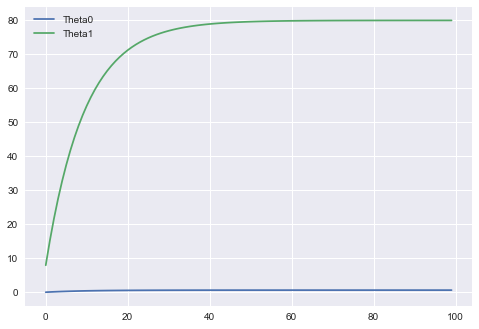

In [60]:
theta_list=np.array(theta_list)
plt.plot(theta_list[:,0],label='Theta0')
plt.plot(theta_list[:,1],label='Theta1')
plt.legend()
plt.show()

In [58]:
#print(theta_list)

# Trajectory traced by Theta Updates in the Loss Function

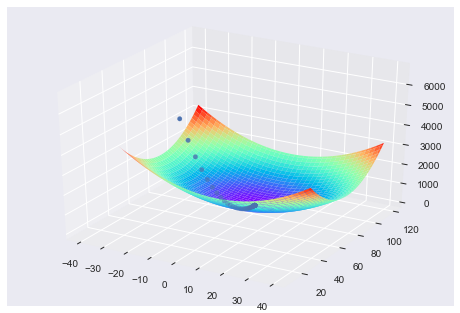

In [64]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

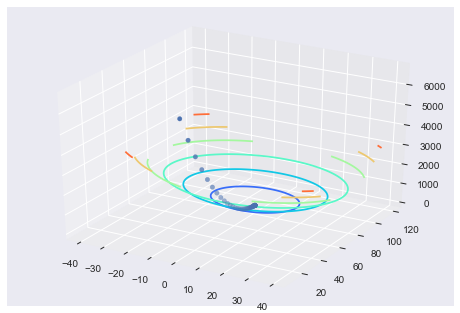

In [65]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

In [66]:
#2D contour plot

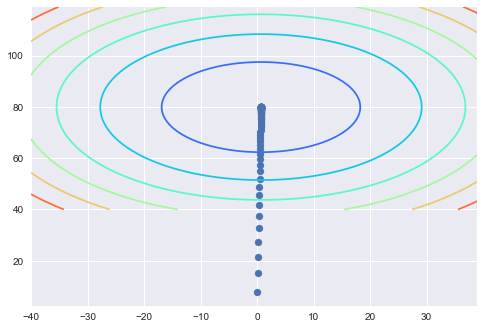

In [67]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

In [69]:
theta_list
np.save("ThetaList.npy",theta_list)